In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.losses import MSE

In [2]:
img = np.array(load_img("../datasets/strange.jpg",target_size=(100,100)))

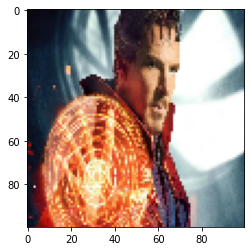

In [3]:
plt.imshow(img)



In [4]:
gray = img /255

In [5]:
flatten = gray.flatten()

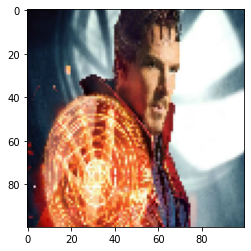

In [6]:
plt.imshow(gray,cmap="gray")

In [7]:
gray.max()


1.0

In [8]:
population = np.random.randn(1000,*flatten.shape)

In [9]:
population.shape

(1000, 30000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


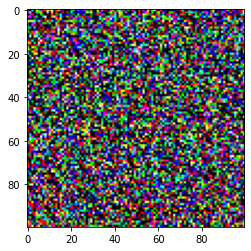

In [10]:
plt.imshow(population[1].reshape(*gray.shape),cmap="gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


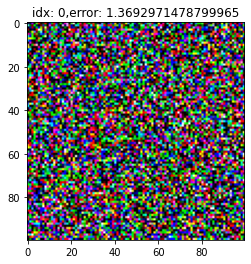

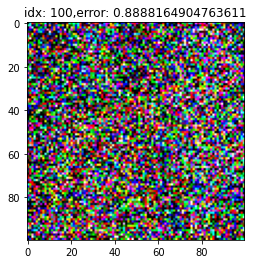

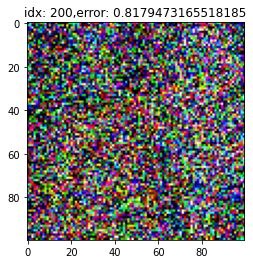

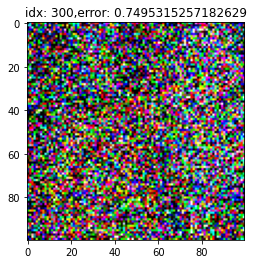

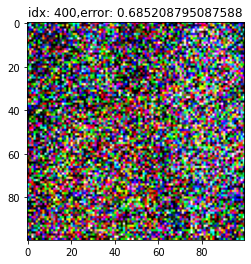

In [ ]:
for i in range(1000):
    errors = MSE(flatten,population).numpy()

    fittest_idx = errors.argsort()[:20]

    fittest = population[fittest_idx]

    parent_1 = fittest[np.random.randint(0,fittest.shape[0],population.shape[0])]

    parent_2 = fittest[np.random.randint(0,fittest.shape[0],population.shape[0])]

    select_one = np.random.randint(0,2,parent_1.shape)

    select_two = 1 - select_one

    repop = parent_1 * select_one + parent_2 * select_two

    mutation = np.random.randn(*population.shape)*.01

    population = repop + mutation

    if i%100 == 0:
        plt.figure()
        plt.title("idx: {},error: {}".format(i,errors[fittest_idx[0]]))
        plt.imshow(fittest[0].reshape(*gray.shape),cmap="gray")
        plt.show()